##### Problem
What if we wanted to look up a specific item relative to its position in the list (e.g., list item in the 5th index) ?

#### Example 3-1. Timings for list lookups for lists of different sizes

In [1]:
l1 = range(10)
%timeit l1[5]

85.8 ns ± 3.66 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [2]:
l2 = range(10000000)
%timeit l2[100000]

105 ns ± 4.5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


##### Result
These lookup time is almost same! Because both searching count are once (O(1))

<hr/>

##### Problem
What if we were given an array with an unknown order and wanted to retrieve a particular element?

#### Example 3-2. A linear search through a list

In [3]:
def linear_search(needle, array):
    counter = 0
    for i, item in enumerate(array):
        counter += 1
        if item == needle:
#             print(counter)
            return i
#     print(counter)
    return -1

In [4]:
%timeit linear_search(5, l1)

642 ns ± 35.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
%timeit linear_search(5, l2)

591 ns ± 21.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
%timeit linear_search(100000, l2)

8.27 ms ± 374 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### Result
- When you uncheck comment on Example 3-2, you can confirm searching count.
- Depending on searching count, your lookup time changes (O(searching count)).
- This algorithm has a worst-case performance of O(n).

##### Solution
- Dictionaries or sets -> O(1)
- <span style="color: red; ">Lists whose data is sorted -> O(log n)</span>

## A More Efficient Search

#### Example 3-3. Efficient searching through a sorted list—binary search

In [7]:
def binary_search(needle, haystack):
    imin, imax = 0, len(haystack)
    counter = 0
    while True:
        counter += 1
        if imin >= imax:
#             print(counter)
            return -1
        midpoint = (imin + imax) // 2
        if haystack[midpoint] > needle:
            imax = midpoint
        elif haystack[midpoint] < needle:
            imin = midpoint + 1
        else:
#             print(counter)
            return midpoint

In [8]:
%timeit binary_search(100000, l2)

5.59 µs ± 148 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
%timeit linear_search(100000, l2)

8.09 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### Result
In comparison with two functions by unchecking comment on Example 3-3,
- binary_search's searching count: 21
- linear_search's searching count: 100000

So the processing speed is completely different.

#### Example 3-4. Finding close values in a list with the bisect module

In [10]:
import bisect
import random

def find_closest(haystack, needle):
    # bisect.bisect_left will return the first index in the haystack that is greater than the needle
    i = bisect.bisect_left(haystack, needle)
    if i == len(haystack):
        return i - 1
    elif haystack[i] == needle:
        return
    elif i > 0:
        j = i - 1
        if haystack[i] - needle > needle - haystack[j]:
            return j
    return i

In [11]:
important_numbers = []

for i in range(10):
    new_number = random.randint(0, 1000)
    # bisect.bisect_left will be inserted new element in order
    bisect.insort(important_numbers, new_number)

print(important_numbers)

[135, 135, 385, 444, 703, 766, 906, 974, 978, 981]


In [12]:
closest_index = find_closest(important_numbers, -250)
print("Closest value to -250: ", important_numbers[closest_index])

closest_index = find_closest(important_numbers, 500)
print("Closest value to 500: ", important_numbers[closest_index])

closest_index = find_closest(important_numbers, 1100)
print("Closest value to 1100: ", important_numbers[closest_index])

Closest value to -250:  135
Closest value to 500:  444
Closest value to 1100:  981


##### Reference
How fast is searching algorithm using bisect.bisect_left?

In [13]:
%timeit bisect.bisect_left(l2, 100000)

2.5 µs ± 66 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


##### Result
- This processing speed is almost similar to binary_search function. (Example 3-2)
- I assumed that binary_search function has a little more conditional branching so takes extra processing time

## Lists Versus Tuples

### Lists as Dynamic Arrays

##### Problem
What happens to the allocated memory transition, when we append numbers to the list one by one?

#### Example 3-6. Resizing of a list

In [15]:
import sys
import copy

l3 = [1]
overallocated_mem = [0]

for i in range(2, 10000):
    l3.append(i)
    # Make new list: Shallow copy of l3
    temp_list = copy.copy(l3)
    overallocated_mem.append(sys.getsizeof(l3) - sys.getsizeof(temp_list))

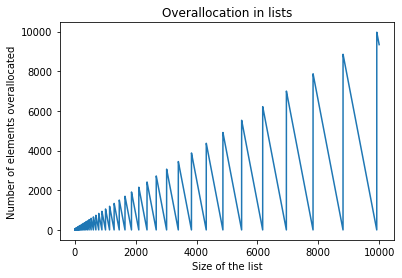

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, title='Overallocation in lists' , xlabel='Size of the list', ylabel='Number of elements overallocated')
ax.plot(l3, overallocated_mem)

##### Result
- While the amount of extra headroom allocated is generally quite small, it can add up.
- If we're appending a lot of elements, we need to pay attention to memory allocation.

### Tuples As Static Arrays

##### Problem
Tuple can not be appended elements later, but what happens in the case of concatenation?

In [17]:
t1 = (1, 2, 3, 4)
t2 = (5, 6, 7, 8)
print(id(t1))
print(id(t2))

4926785080
4528712104


In [18]:
id(t1 + t2)

4925584664

##### Result
When two tuples are concatenated together, a new tuple is formed.

<hr>

##### Problem
What if we compare with type of list and tuple?

In [19]:
%timeit l4 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

57.9 ns ± 2.09 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [20]:
l4 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sys.getsizeof(l4)

144

In [ ]:
%timeit t3 = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [ ]:
t3 = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
sys.getsizeof(t3)

##### Result
- Instantiation of tuple object is faster than that of list object.
- Size of tuple object is larger than  that of list object.

## Reference
- [bisect — Array bisection algorithm](https://docs.python.org/3/library/bisect.html)
- [Dark Secrets of Python Memory Allocation](https://towardsdatascience.com/dark-secrets-of-python-memory-allocation-c5d22879d8a9)